# LAPTOP PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

## READING THE CSV FILE

In [2]:
df = pd.read_csv("C:\\Users\\ameym\\Downloads\\laptop_price.csv", encoding = 'latin1')
df.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
896,908,Dell,Inspiron 7567,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050Ti,Linux,2.62kg,929.0
112,115,Lenovo,ThinkPad Yoga,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.37kg,1399.0
746,754,Samsung,Notebook 9,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,0.81kg,1649.0
76,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.0
574,581,Lenovo,V330-15IKB (i5-8250U/4GB/500GB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,2.05kg,685.0


In [3]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [4]:
df.shape

(1303, 13)

In [5]:
na_df = df[df['Price_euros'].isna()]
na_df.shape

(0, 13)

## DATA EXPLORATION

In [6]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

### DROPPING Product and laptop_ID

In [7]:
df = df.drop(['laptop_ID', 'Product'], axis = 'columns')

In [8]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
631,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62kg,1479.0
647,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg,2599.0
1145,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.0kg,1899.0
1202,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,2kg,1285.0
718,Mediacom,Notebook,14.0,IPS Panel Full HD 1920x1200,Intel Atom Z8350 1.92GHz,4GB,32GB HDD,Intel HD Graphics 400,Windows 10,1.4kg,265.0


### DATA CLEANING 

In [9]:
df.head(5) # Dataframe before Cleaning

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#### WEIGHT

In [10]:
df["Weight_in_kg"] = df['Weight'].str.split('kg').apply(lambda x: x[0])

In [11]:
df = df.drop(['Weight'], axis = 1) #Dropping the Weight Column

In [12]:
df["Weight_in_kg"] = df["Weight_in_kg"].astype('float64')

#### RAM

In [13]:
df["RAM_in_GB"] = df['Ram'].str.split('GB').apply(lambda x: x[0])

In [14]:
df = df.drop(['Ram'], axis = 1) #Dropping the RAM Column

In [15]:
df["RAM_in_GB"] = df["RAM_in_GB"].astype('float64')

#### ScreenResolution

In [16]:
df['ScreenResolution'] = df['ScreenResolution'].str.split(' ').apply(lambda x: x[-1])

In [17]:
df['Screen_Width'] = df['ScreenResolution'].str.split('x').apply(lambda x: x[0]) #getting the screen width

In [18]:
df['Screen_Height'] = df['ScreenResolution'].str.split('x').apply(lambda x: x[1])  # getting the screen height

In [19]:
df = df.drop(['ScreenResolution'], axis = 1)   #dropping the resolution column

In [20]:
df['Screen_Width'] = df['Screen_Width'].astype('float64')

In [21]:
df['Screen_Height'] = df['Screen_Height'].astype('float64')

In [22]:
df.head(5)

,Company,TypeName,Inches,Cpu,Memory,Gpu,OpSys,Price_euros,Weight_in_kg,RAM_in_GB,Screen_Width,Screen_Height
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69,1.37,8.0,2560.0,1600.0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94,1.34,8.0,1440.0,900.0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,575.00,1.86,8.0,1920.0,1080.0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,2537.45,1.83,16.0,2880.0,1800.0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60,1.37,8.0,2560.0,1600.0


#### Memory

In [23]:
df['Memory_amount'] = df['Memory'].str.split(' ').apply(lambda x : x[0]) # getting the amount of memory

In [24]:
df['Memory_type'] = df['Memory'].str.split(' ').apply(lambda x : x[1]) # getting the type of memory storage

In [25]:
df = df.drop(['Memory'], axis = 1)  # dropping the memory column

In [26]:
def turn_memory_to_GB(value):                                       # function to turn TB memory into equivalent GB memory
    if 'GB' in value:
        return float((value[0 : value.find('GB')]))
    elif 'TB' in value:
        return float((value[0 : value.find('TB')]))*1000

In [27]:
df['Memory_amount'] = df['Memory_amount'].apply(turn_memory_to_GB)

In [28]:
df.head(5)

,Company,TypeName,Inches,Cpu,Gpu,OpSys,Price_euros,Weight_in_kg,RAM_in_GB,Screen_Width,Screen_Height,Memory_amount,Memory_type
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,Intel Iris Plus Graphics 640,macOS,1339.69,1.37,8.0,2560.0,1600.0,128.0,SSD
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,Intel HD Graphics 6000,macOS,898.94,1.34,8.0,1440.0,900.0,128.0,Flash
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620,No OS,575.00,1.86,8.0,1920.0,1080.0,256.0,SSD
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,AMD Radeon Pro 455,macOS,2537.45,1.83,16.0,2880.0,1800.0,512.0,SSD
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,Intel Iris Plus Graphics 650,macOS,1803.60,1.37,8.0,2560.0,1600.0,256.0,SSD


#### CPU

In [29]:
df['Cpu_frequency'] = df['Cpu'].str.split(' ').apply(lambda x : x[-1])  # getting the CPU's Frequency

In [30]:
df['Cpu'] = df['Cpu'].str.split(' ').apply(lambda x : x[0])  # getting the CPU manufacturer

In [31]:
df['Cpu_frequency'] = df['Cpu_frequency'].str.split('GHz').apply(lambda x : x[0])

In [32]:
df['Cpu_frequency'] = df['Cpu_frequency'].astype('float64')

In [33]:
df.head(5)

,Company,TypeName,Inches,Cpu,Gpu,OpSys,Price_euros,Weight_in_kg,RAM_in_GB,Screen_Width,Screen_Height,Memory_amount,Memory_type,Cpu_frequency
0,Apple,Ultrabook,13.3,Intel,Intel Iris Plus Graphics 640,macOS,1339.69,1.37,8.0,2560.0,1600.0,128.0,SSD,2.3
1,Apple,Ultrabook,13.3,Intel,Intel HD Graphics 6000,macOS,898.94,1.34,8.0,1440.0,900.0,128.0,Flash,1.8
2,HP,Notebook,15.6,Intel,Intel HD Graphics 620,No OS,575.00,1.86,8.0,1920.0,1080.0,256.0,SSD,2.5
3,Apple,Ultrabook,15.4,Intel,AMD Radeon Pro 455,macOS,2537.45,1.83,16.0,2880.0,1800.0,512.0,SSD,2.7
4,Apple,Ultrabook,13.3,Intel,Intel Iris Plus Graphics 650,macOS,1803.60,1.37,8.0,2560.0,1600.0,256.0,SSD,3.1


#### GPU

In [34]:
df['Gpu'] = df['Gpu'].str.split(' ').apply(lambda x : x[0]) # Getting the GPU manufacturer

In [35]:
df['Gpu'] = df['Gpu'] + "_GPU"  # Since CPU and GPU manufacturers are similar we clearly indicate which is used for GPU

#### Final dataframe after cleaning

In [36]:
df.head(5)

,Company,TypeName,Inches,Cpu,Gpu,OpSys,Price_euros,Weight_in_kg,RAM_in_GB,Screen_Width,Screen_Height,Memory_amount,Memory_type,Cpu_frequency
0,Apple,Ultrabook,13.3,Intel,Intel_GPU,macOS,1339.69,1.37,8.0,2560.0,1600.0,128.0,SSD,2.3
1,Apple,Ultrabook,13.3,Intel,Intel_GPU,macOS,898.94,1.34,8.0,1440.0,900.0,128.0,Flash,1.8
2,HP,Notebook,15.6,Intel,Intel_GPU,No OS,575.00,1.86,8.0,1920.0,1080.0,256.0,SSD,2.5
3,Apple,Ultrabook,15.4,Intel,AMD_GPU,macOS,2537.45,1.83,16.0,2880.0,1800.0,512.0,SSD,2.7
4,Apple,Ultrabook,13.3,Intel,Intel_GPU,macOS,1803.60,1.37,8.0,2560.0,1600.0,256.0,SSD,3.1


In [37]:
df.shape

(1303, 14)

In [38]:
df.dtypes

Company           object
TypeName          object
Inches           float64
Cpu               object
Gpu               object
OpSys             object
Price_euros      float64
Weight_in_kg     float64
RAM_in_GB        float64
Screen_Width     float64
Screen_Height    float64
Memory_amount    float64
Memory_type       object
Cpu_frequency    float64
dtype: object

#### Categorical columns

In [39]:
columns = ['Memory_type', 'OpSys', 'Gpu', 'Cpu', 'TypeName', 'Company'] 

#### Numeric columns that need to be scaled

In [40]:
numeric_columns = ['Inches', 'Price_euros', 'Weight_in_kg', 'RAM_in_GB', 'Screen_Width', 'Screen_Height', 'Memory_amount', 'Cpu_frequency'] 

### ONE-HOT ENCODING

In [41]:
df1 = pd.get_dummies(data = df, columns = ['Memory_type', 'OpSys', 'Gpu', 'Cpu', 'TypeName', 'Company'])
df1.columns

Index(['Inches', 'Price_euros', 'Weight_in_kg', 'RAM_in_GB', 'Screen_Width',
       'Screen_Height', 'Memory_amount', 'Cpu_frequency', 'Memory_type_Flash',
       'Memory_type_HDD', 'Memory_type_Hybrid', 'Memory_type_SSD',
       'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS', 'Gpu_AMD_GPU', 'Gpu_ARM_GPU',
       'Gpu_Intel_GPU', 'Gpu_Nvidia_GPU', 'Cpu_AMD', 'Cpu_Intel',
       'Cpu_Samsung', 'TypeName_2 in 1 Convertible', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'Company_Acer', 'Company_Apple', 'Company_Asus',
       'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu', 'Company_Google',
       'Company_HP', 'Company_Huawei', 'Company_LG', 'Company_Lenovo',
       'Company_MSI', 'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Comp

In [42]:
df1.head(5)

,Inches,Price_euros,Weight_in_kg,RAM_in_GB,Screen_Width,Screen_Height,Memory_amount,Cpu_frequency,Memory_type_Flash,Memory_type_HDD,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,13.3,1339.69,1.37,8.0,2560.0,1600.0,128.0,2.3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13.3,898.94,1.34,8.0,1440.0,900.0,128.0,1.8,1,0,...,0,0,0,0,0,0,0,0,0,0
2,15.6,575.00,1.86,8.0,1920.0,1080.0,256.0,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.4,2537.45,1.83,16.0,2880.0,1800.0,512.0,2.7,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13.3,1803.60,1.37,8.0,2560.0,1600.0,256.0,3.1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df1.shape

(1303, 53)

### DATA SCALING FOR NUMERIC COLUMNS

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()
df1[numeric_columns] = scaler.fit_transform(df1[numeric_columns])

In [46]:
df1.head(5)

,Inches,Price_euros,Weight_in_kg,RAM_in_GB,Screen_Width,Screen_Height,Memory_amount,Cpu_frequency,Memory_type_Flash,Memory_type_HDD,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,0.385542,0.196741,0.169576,0.096774,0.482619,0.597701,0.060241,0.518519,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.385542,0.122353,0.162095,0.096774,0.029911,0.094828,0.060241,0.333333,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.662651,0.067679,0.291771,0.096774,0.223929,0.224138,0.124498,0.592593,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.638554,0.398895,0.284289,0.225806,0.611964,0.741379,0.253012,0.666667,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.385542,0.275038,0.169576,0.096774,0.482619,0.597701,0.124498,0.814815,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df1.dtypes

Inches                         float64
Price_euros                    float64
Weight_in_kg                   float64
RAM_in_GB                      float64
Screen_Width                   float64
Screen_Height                  float64
Memory_amount                  float64
Cpu_frequency                  float64
Memory_type_Flash                uint8
Memory_type_HDD                  uint8
Memory_type_Hybrid               uint8
Memory_type_SSD                  uint8
OpSys_Android                    uint8
OpSys_Chrome OS                  uint8
OpSys_Linux                      uint8
OpSys_Mac OS X                   uint8
OpSys_No OS                      uint8
OpSys_Windows 10                 uint8
OpSys_Windows 10 S               uint8
OpSys_Windows 7                  uint8
OpSys_macOS                      uint8
Gpu_AMD_GPU                      uint8
Gpu_ARM_GPU                      uint8
Gpu_Intel_GPU                    uint8
Gpu_Nvidia_GPU                   uint8
Cpu_AMD                  

In [48]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')
    print("\n")

Inches: [0.38554217 0.6626506  0.63855422 0.46987952 0.22891566 0.18072289
 0.86746988 0.         0.40963855 0.28915663 0.34939759 1.
 0.45783133 0.26506024 0.8313253  0.59036145 0.48192771 0.14457831]


Price_euros: [0.19674093 0.12235274 0.06767932 0.39889451 0.27503797 0.03814346
 0.33180928 0.16619409 0.22295359 0.10059072 0.03711392 0.02885907
 0.38244219 0.05483544 0.1836962  0.22692827 0.09637131 0.45299578
 0.05485232 0.13586498 0.0030211  0.13924051 0.01417722 0.10886076
 0.08185654 0.04128945 0.15611814 0.10565401 0.18970464 0.12185654
 0.01198143 0.00421941 0.04472574 0.28607595 0.13907173 0.01265823
 0.03257384 0.05311224 0.11898734 0.03628692 0.22362869 0.05890127
 0.0857384  0.21012658 0.03291139 0.18987342 0.07848101 0.0492827
 0.02447257 0.11257384 0.03788861 0.15679325 0.03544304 0.10021941
 0.06956793 0.38396624 0.04067511 0.07172996 0.12945148 0.08708861
 0.30531646 0.04467342 0.0092827  0.06329114 0.13080169 0.15443038
 0.13181435 0.11746835 0.15544304 0.05822785 0.

### Making corelation matrix and checking how columns relate to each other

In [49]:
df1.corr()   #checking general correlations and how each column correlates with each other

,Inches,Price_euros,Weight_in_kg,RAM_in_GB,Screen_Width,Screen_Height,Memory_amount,Cpu_frequency,Memory_type_Flash,Memory_type_HDD,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
Inches,1.000000,0.068197,0.827631,0.237993,-0.071245,-0.095404,0.269511,0.307870,-0.367908,0.271145,...,0.001667,-0.055055,0.207877,-0.080415,-0.072377,-0.025923,-0.069898,-0.090946,-0.046401,-0.022075
Price_euros,0.068197,1.000000,0.210370,0.743007,0.556529,0.552809,-0.122365,0.430293,-0.210823,-0.426121,...,0.067053,-0.029007,0.180100,-0.087161,0.047562,0.233756,0.034584,0.040339,-0.071972,0.000776
Weight_in_kg,0.827631,0.210370,1.000000,0.383874,-0.032880,-0.053846,0.179962,0.320434,-0.259337,0.166644,...,-0.071401,-0.029767,0.194364,-0.077511,-0.080508,0.017343,-0.090664,-0.117163,-0.059121,-0.034930
RAM_in_GB,0.237993,0.743007,0.383874,1.000000,0.433121,0.424437,0.018271,0.368000,-0.192327,-0.318614,...,0.021591,-0.036538,0.190425,-0.067495,-0.005114,0.159724,0.037484,0.010946,-0.053302,0.017663
Screen_Width,-0.071245,0.556529,-0.032880,0.433121,1.000000,0.994219,-0.073893,0.183548,-0.125145,-0.350900,...,0.002450,0.024446,0.040508,0.003748,0.049688,0.166823,0.002866,-0.058502,-0.012714,0.002830
Screen_Height,-0.095404,0.552809,-0.053846,0.424437,0.994219,1.000000,-0.080979,0.169668,-0.102236,-0.354072,...,0.001549,0.017286,0.035947,0.006799,0.103590,0.161842,0.009466,-0.060738,-0.013430,0.001789
Memory_amount,0.269511,-0.122365,0.179962,0.018271,-0.073893,-0.080979,1.000000,0.066295,-0.252255,0.748250,...,0.009360,0.033658,-0.111997,-0.084747,-0.035645,0.028001,-0.059112,-0.067113,-0.063989,-0.029081
Cpu_frequency,0.307870,0.430293,0.320434,0.368000,0.183548,0.169668,0.066295,1.000000,-0.398215,-0.091832,...,0.009608,0.052138,0.173196,-0.135896,0.027041,0.064482,0.031326,0.052798,-0.112789,-0.027274
Memory_type_Flash,-0.367908,-0.210823,-0.259337,-0.192327,-0.125145,-0.102236,-0.252255,-0.398215,1.000000,-0.157099,...,-0.011872,-0.008602,-0.051386,0.071993,-0.016809,-0.018163,0.058961,-0.048331,0.224540,-0.013714
Memory_type_HDD,0.271145,-0.426121,0.166644,-0.318614,-0.350900,-0.354072,0.748250,-0.091832,-0.157099,1.000000,...,-0.030537,-0.034250,-0.123672,-0.023528,-0.043236,-0.046718,-0.053015,-0.043325,-0.035275,-0.035275


<AxesSubplot:>

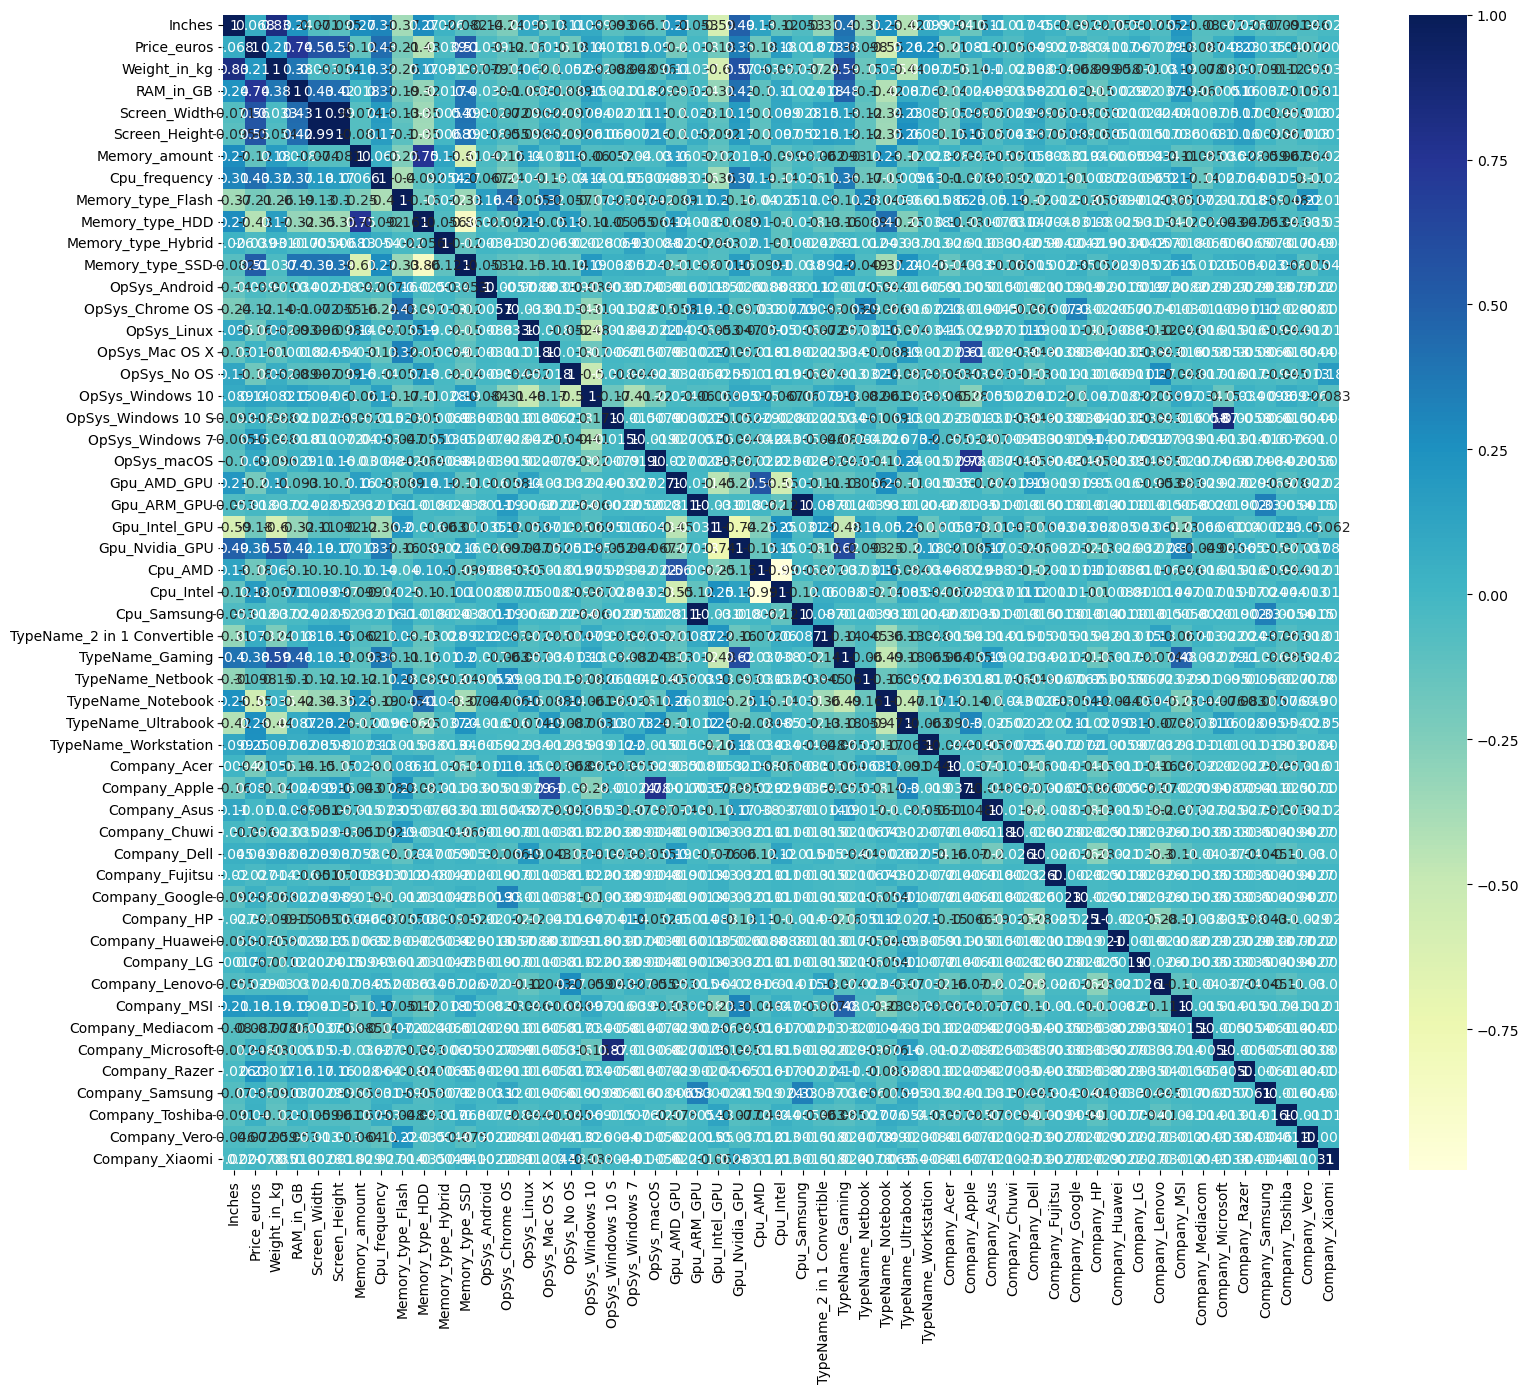

In [50]:
plt.figure(figsize = (18, 15))
sns.heatmap(df1.corr(), annot = True, cmap = 'YlGnBu')

In [51]:
target_correlations = df1.corr()['Price_euros'].apply(abs).sort_values()   # making targetted correlation matrix for price
target_correlations

Company_Xiaomi                 0.000776
Company_Asus                   0.010376
OpSys_Mac OS X                 0.015656
Company_Huawei                 0.016851
OpSys_Windows 10 S             0.018312
Gpu_ARM_GPU                    0.018431
Cpu_Samsung                    0.018431
Company_Fujitsu                0.027135
Company_Lenovo                 0.029007
Company_Samsung                0.034584
Company_Google                 0.038086
OpSys_Android                  0.038700
Memory_type_Hybrid             0.039386
Company_Toshiba                0.040339
Company_HP                     0.041291
Company_Microsoft              0.047562
Company_Dell                   0.048509
Company_Chuwi                  0.055646
Company_LG                     0.067053
Inches                         0.068197
Company_Vero                   0.071972
TypeName_2 in 1 Convertible    0.072675
Company_Apple                  0.080688
Company_Mediacom               0.087161
OpSys_macOS                    0.089928


## Splitting data into training and testing

In [52]:
x = df1.drop(['Price_euros'], axis = 'columns')
y = df1['Price_euros']

In [53]:
x.shape

(1303, 52)

In [54]:
y.shape

(1303,)

In [55]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2)

In [56]:
x_train.head(5)

,Inches,Weight_in_kg,RAM_in_GB,Screen_Width,Screen_Height,Memory_amount,Cpu_frequency,Memory_type_Flash,Memory_type_HDD,Memory_type_Hybrid,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
179,0.385542,0.149626,0.096774,1.000000,1.000000,0.124498,0.259259,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1259,0.662651,0.426434,0.096774,0.223929,0.224138,0.060241,0.629630,0,0,0,...,0,0,1,0,0,0,0,0,0,0
675,0.662651,0.426434,0.225806,0.223929,0.224138,0.124498,0.703704,0,0,0,...,0,0,1,0,0,0,0,0,0,0
395,0.662651,0.304239,0.032258,0.223929,0.224138,0.124498,0.777778,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1021,0.385542,0.127182,0.096774,0.223929,0.224138,0.124498,0.518519,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
y_train.head(5)

179     0.223629
1259    0.178059
675     0.189030
395     0.054852
1021    0.238987
Name: Price_euros, dtype: float64

In [58]:
x_train.shape

(1042, 52)

In [59]:
x_test.shape

(261, 52)

In [60]:
y_train.shape

(1042,)

In [61]:
y_test.shape

(261,)

## Building the Model

In [62]:
from keras import models
from keras import layers

In [63]:
def build_model ():
    
    model = models.Sequential()
    
    model.add(layers.Dense(64, activation = "relu", input_shape = (x_train.shape[1], )))
    model.add(layers.Dense(48, activation = 'relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer = 'rmsprop',
                  loss = 'mse',
                  metrics = ['mae'])
    
    return model

In [64]:
k=4
num_val_samples = len(x_train) // k
num_epochs = 30
all_mae_history = []

for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
                                        [x_train[:i * num_val_samples],
                                        x_train[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
                                            [y_train[:i * num_val_samples],
                                            y_train[(i + 1) * num_val_samples:]],
                                            axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, validation_data = (val_data, val_targets), batch_size = 1, verbose = 0)
    mae_history = history.history['val_mae']
    all_mae_history.append(mae_history) 

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [65]:
average_mae_history = [
np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

In [66]:
average_mae_history

[0.05939108692109585,
 0.06325937155634165,
 0.053114794194698334,
 0.044191040098667145,
 0.04930915217846632,
 0.04316447675228119,
 0.042866370640695095,
 0.0412929393351078,
 0.04098084010183811,
 0.03868529759347439,
 0.03940978366881609,
 0.04199791792780161,
 0.04061397351324558,
 0.04194919019937515,
 0.039201741106808186,
 0.04206377547234297,
 0.03751343488693237,
 0.042524286545813084,
 0.03865401167422533,
 0.03702629543840885,
 0.04041149653494358,
 0.03796383272856474,
 0.03954883199185133,
 0.038848952390253544,
 0.03902770113199949,
 0.03953815810382366,
 0.040346638299524784,
 0.03834955394268036,
 0.038001482374966145,
 0.04044240992516279]

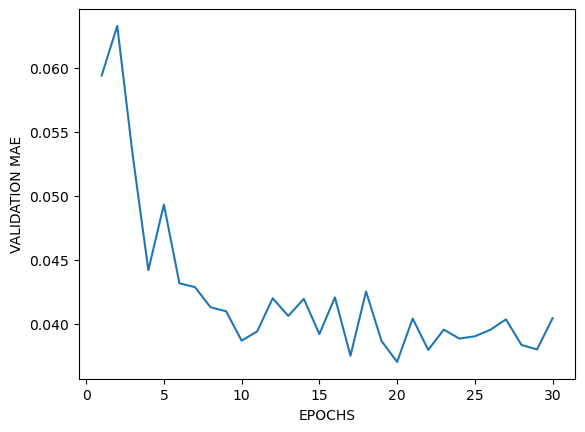

In [67]:
plt.plot(range(1, num_epochs+1), average_mae_history)
plt.xlabel('EPOCHS')
plt.ylabel('VALIDATION MAE')
plt.show()

In [68]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
test_mae_score

9/9 [==============================] - 0s 998us/step - loss: 0.0028 - mae: 0.0381


0.038074519485235214

In [69]:
scaled_predictions = model.predict(x_test)

9/9 [==============================] - 0s 748us/step


In [70]:
def rev_min_max_func(scaled_val):
    max_val = max(df['Price_euros'])
    min_val = min(df['Price_euros'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return(og_val)

In [71]:
rev_min_max_func(scaled_predictions)

array([[2672.8784 ],
       [1760.7498 ],
       [ 206.599  ],
       [ 668.1217 ],
       [1793.3639 ],
       [1081.5776 ],
       [1463.8157 ],
       [1297.7596 ],
       [2042.8132 ],
       [1168.4397 ],
       [1628.8201 ],
       [ 789.7626 ],
       [ 624.2856 ],
       [1156.6941 ],
       [ 989.69885],
       [ 549.08514],
       [2113.2915 ],
       [ 412.60135],
       [ 727.0845 ],
       [ 591.05066],
       [ 467.76825],
       [ 385.01215],
       [ 810.2373 ],
       [1138.1234 ],
       [1235.5458 ],
       [1459.3019 ],
       [1759.496  ],
       [1528.6489 ],
       [ 510.1852 ],
       [ 836.30756],
       [1609.1244 ],
       [ 429.6477 ],
       [ 383.78662],
       [ 666.5937 ],
       [ 615.9219 ],
       [1967.0408 ],
       [ 740.14575],
       [1379.9088 ],
       [1282.3872 ],
       [1367.5594 ],
       [1045.5564 ],
       [1551.7992 ],
       [1326.87   ],
       [1413.4307 ],
       [ 744.85345],
       [1258.2926 ],
       [ 839.84406],
       [1709.

In [72]:
rev_min_max_func(y_test)

1136    3949.4
121     2241.5
673      349.0
662      535.0
945      999.0
         ...  
1252     569.0
842      910.0
1233    1598.0
1166    1390.0
693     2590.0
Name: Price_euros, Length: 261, dtype: float64